In [1]:
import numpy as np
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

import cv2

import json
from urllib import request, parse


from PIL import Image
from matplotlib.patches import Ellipse, Circle

In [4]:
def loadJson(name):
    f = open(name, encoding='utf-8-sig')        
    data = json.load(f)
    face_rect = data['face_rect']
    iris = data['iris']
    landmark = data['landmark']
#     print(face_rect)
#     print(iris)
#     print(landmark[24:56])
    return data

def display(img,str_json=None):   
    plt.axis('off')
    plt.figure(figsize=(32,24))
    ax = plt.subplot(121)
    plt.imshow(img)
    #eye 0 1 16 17
    if str_json != None:
        for i in range(32):
            s = 0
            x = str_json['landmark'][48+s*2+i*2]
            y = str_json['landmark'][48+s*2+i*2+1]
            plt.plot(x, y,'.',label="point")
            plt.text(x,y,str(i%16))

        x = str_json['iris'][0]
        y = str_json['iris'][1]
        r = str_json['iris'][2]
        plt.plot(x, y,'.',label="point")
        cir = Circle(xy =(x,y), radius=r, alpha=0.3)
        ax.add_patch(cir)
        x = str_json['iris'][3]
        y = str_json['iris'][4]
        r = str_json['iris'][5]
        plt.plot(x, y,'.',label="point")
        cir = Circle(xy =(x,y), radius=r, alpha=0.3)
        ax.add_patch(cir)
    plt.show()
    
def rotation(path, angle):
    img = Image.open(path)
    str_json = loadJson(path + '.json')
    display(img, str_json)
    img_rotate = img.rotate(angle) 
#     img_rotate.save('../data/images/101.jpg', 'JPEG')
#     display(img_rotate)

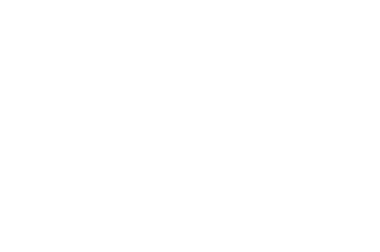

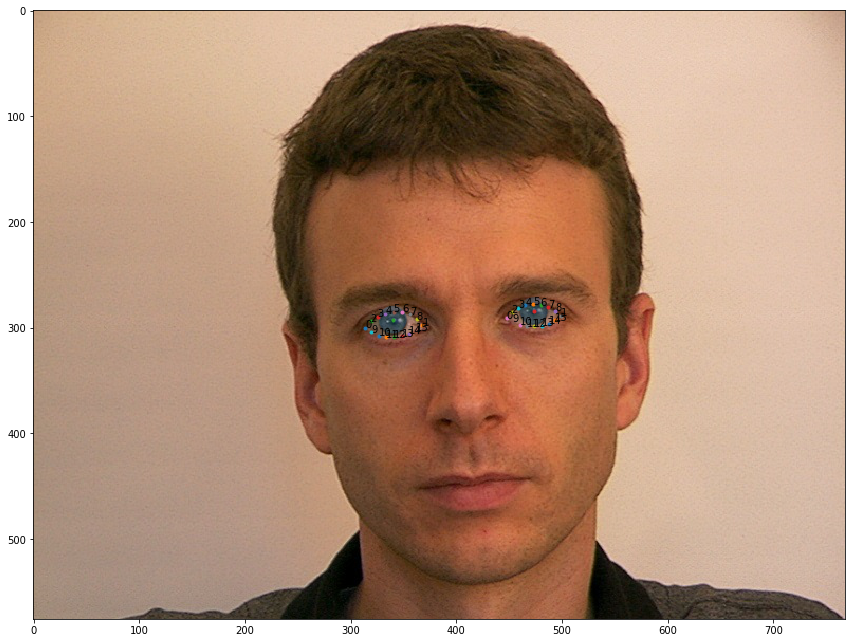

In [5]:
rotation('../data/images/001.jpg', -10)

In [6]:
def displayEye(img,x0=0,y0=0,str_json=None,mirro=False):   
    plt.axis('off')
    (w0,h0) = img.size
    ax = plt.subplot(121)
    plt.imshow(img)
    if str_json != None:
        for i in range(32):
            s = 0
            x = str_json['landmark'][48+s*2+i*2]-x0
            y = str_json['landmark'][48+s*2+i*2+1]-y0
#             plt.plot(x, y,'.',label="point")
#             plt.text(x,y,str(i%16))
        if mirro:
            i = 0
            x = x0+w0-str_json['landmark'][48+i*2]
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")
            i = 1
            x = x0+w0-str_json['landmark'][48+i*2]
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")

            i = 16
            x = x0+w0-str_json['landmark'][48+i*2]
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")
            i = 17
            x = x0+w0-str_json['landmark'][48+i*2]
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")

            x = x0+w0-str_json['iris'][0]
            y = str_json['iris'][1]-y0
            r = str_json['iris'][2]
            plt.plot(x, y,'.',label="point")
            cir = Circle(xy =(x,y), radius=r, alpha=0.3)
            ax.add_patch(cir)
            x = x0+w0-str_json['iris'][3]
            y = str_json['iris'][4]-y0
            r = str_json['iris'][5]
            plt.plot(x, y,'.',label="point")
            cir = Circle(xy =(x,y), radius=r, alpha=0.3)
            ax.add_patch(cir)
        else:
            i = 0
            x = str_json['landmark'][48+i*2]-x0
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")
            i = 1
            x = str_json['landmark'][48+i*2]-x0
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")

            i = 16
            x = str_json['landmark'][48+i*2]-x0
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")
            i = 17
            x = str_json['landmark'][48+i*2]-x0
            y = str_json['landmark'][48+i*2+1]-y0
            plt.plot(x, y,'.',label="point")

            x = str_json['iris'][0]-x0
            y = str_json['iris'][1]-y0
            r = str_json['iris'][2]
            plt.plot(x, y,'.',label="point")
            cir = Circle(xy =(x,y), radius=r, alpha=0.3)
            ax.add_patch(cir)
            x = str_json['iris'][3]-x0
            y = str_json['iris'][4]-y0
            r = str_json['iris'][5]
            plt.plot(x, y,'.',label="point")
            cir = Circle(xy =(x,y), radius=r, alpha=0.3)
            ax.add_patch(cir)
    plt.show()
def save0_5(path):
    img = Image.open(path)
    str_json = loadJson(path + '.json')
    x = str_json['face_rect'][0]
    y = str_json['face_rect'][1]
    w = str_json['face_rect'][2]
    h = str_json['face_rect'][3]
    print(x, y, w, h)
    y = int(y + h/4)
    h = int(h/4)
    eye = img.crop((x, y, x+w, y+h))
    print(x, y, w, h)
#     displayEye(eye,x,y,str_json)
    
    eye = eye.transpose(Image.FLIP_LEFT_RIGHT)
#     displayEye(eye,x,y,str_json,True)
    
#     img = cv2.cvtColor(numpy.asarray(image),cv2.COLOR_RGB2BGR)  
    
    img  = cv2.imread(path, cv2.IMREAD_COLOR)
#     image = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#     cv2.namedWindow("Image")
#     cv2.imshow("Image", img)
#     cv2.imwrite(path+ '.n.jpg', img)
#     displayEye(image)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    g = Image.fromarray(cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB))
#     cv2.imwrite(path+ '.g.jpg', gray)
#     g.save(path+ '.g.jpg')
#     displayEye(g)
    faceCascade = cv2.CascadeClassifier('../model/haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(img, 1.3, 5)
    if len(faces) > 0:
        x = faces[0][0]
        y = faces[0][1]
        w = faces[0][2]
        h = faces[0][3]
        print(x, y, w, h)
        x = int(x + w/8)
        w = int(w - w/4)
        y = int(y + h/4)
        h = int(h/4)
        eye = g.crop((x, y, x+w, y+h))
#         eye = image[y:y+h, x:x+w]
#         eye = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        print(x, y, w, h)
        out = eye.resize((300, 100),Image.ANTIALIAS)
        displayEye(eye,x,y,str_json)
        displayEye(out,x,y,str_json)
#         im = np.array(image.convert('L'),'f')
#         displayEye(im)
#         eye = eye.transpose(Image.FLIP_LEFT_RIGHT)
#         displayEye(eye)
#         for x, y, w, h in faces:
            
    


264 138 288 396
264 237 288 99
233 157 345 345
276 243 258 86


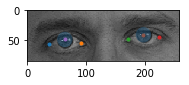

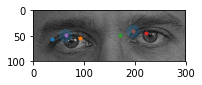

In [7]:
save0_5('../data/images/001.jpg')